In [1]:
from google.colab import files
uploaded = files.upload()

Saving face_data.zip to face_data.zip


# New section

In [2]:
import zipfile
import os

# Unzip
with zipfile.ZipFile("face_data.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

# Verify
os.listdir("face_data/train")

['angry', 'happy', 'surprise', 'disgust', 'neutral', 'sad', 'fear']

In [3]:
!pip install tensorflow opencv-python matplotlib

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt


In [5]:
train_path = "face_data/train"
test_path = "face_data/test"

# Parameters
img_size = 48
batch_size = 32

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(train_gen, validation_data=test_gen, epochs=50)

Epoch 1/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.5896 - loss: 1.0589 - val_accuracy: 0.5756 - val_loss: 1.1377
Epoch 2/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.5904 - loss: 1.0618 - val_accuracy: 0.5644 - val_loss: 1.1593
Epoch 3/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.5921 - loss: 1.0534 - val_accuracy: 0.5736 - val_loss: 1.1515
Epoch 4/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.5976 - loss: 1.0503 - val_accuracy: 0.5758 - val_loss: 1.1416
Epoch 5/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.6011 - loss: 1.0502 - val_accuracy: 0.5745 - val_loss: 1.1437
Epoch 6/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.5978 - loss: 1.0535 - val_accuracy: 0.5681 - val_loss: 1.1471
Epoch 7/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.5906 - loss: 1.0635 - val_accuracy: 0.5716 - val_loss: 1.1451
Epoch 8/50
898/898 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.5996 - loss: 1.0444 - 

In [14]:
model.save("face_emotion_model.h5")

# Download the model
from google.colab import files
files.download("face_emotion_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

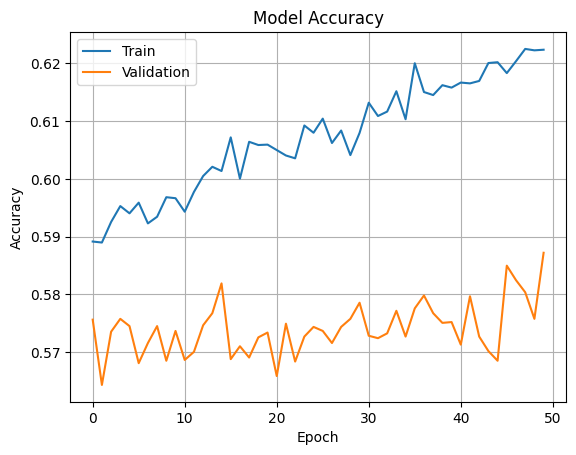

In [15]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()